In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rfm_df = pd.read_excel('rfm_df.xlsx')
rfm_df

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,...,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,R_Score,F_Score,M_Score,RFM_Segment,segment_group
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,...,0,0,0,0,0,3,1,2,312,Freshers
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,...,0,0,0,0,1,3,1,1,311,Freshers
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,...,0,0,0,0,0,1,2,2,122,At Churn Risk
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,...,0,0,0,0,0,3,1,2,312,Freshers
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,...,0,0,0,0,0,3,1,2,312,Freshers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,...,0,0,0,0,0,3,1,1,311,Freshers
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,...,0,0,0,2,0,2,1,2,212,Sleeping
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,...,0,2,0,0,0,3,1,3,313,Freshers
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,...,0,0,0,0,0,3,1,2,312,Freshers


# Risky Margin: shares

In [33]:
risk_segments = ['At Churn Risk', 'Sleeping', 'Lost']
risk_table_full = (
    rfm_df
    .groupby(['quarter', 'segment_group'])['total_margin']
    .sum()
    .reset_index()
)

In [ ]:
risk_table_full['risk_flag'] = risk_table_full['segment_group'].apply(lambda x: 'risk' if x in risk_segments else 'safe')

In [36]:
pivot_colored = risk_table_full.pivot_table(index='quarter', columns='segment_group', values='total_margin', fill_value=0)
pivot_colored

segment_group,At Churn Risk,Drifting,Freshers,Lost,Loyal,Sleeping,VIP
quarter,,,,,,,
2017Q1,20758180.12,7618142.38,20390384.34,2499480.25,5374416.07,5042817.59,1473408.40
2017Q2,8487454.11,17565813.12,15126100.50,7024998.97,4824875.20,15311167.06,1524392.00
2017Q3,4037283.29,10215618.18,12276404.73,8707528.84,8867319.49,14616423.64,8844524.55
2017Q4,711173.45,3030127.11,6885038.77,5399695.44,165216.53,4947409.85,8587770.79


In [39]:
segment_colors = {}
base_risk_colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333']
safe_color = '#cccccc'

In [40]:
for seg in pivot_colored.columns:
    if seg in risk_segments:
        segment_colors[seg] = base_risk_colors[risk_segments.index(seg)]
    else:
        segment_colors[seg] = safe_color

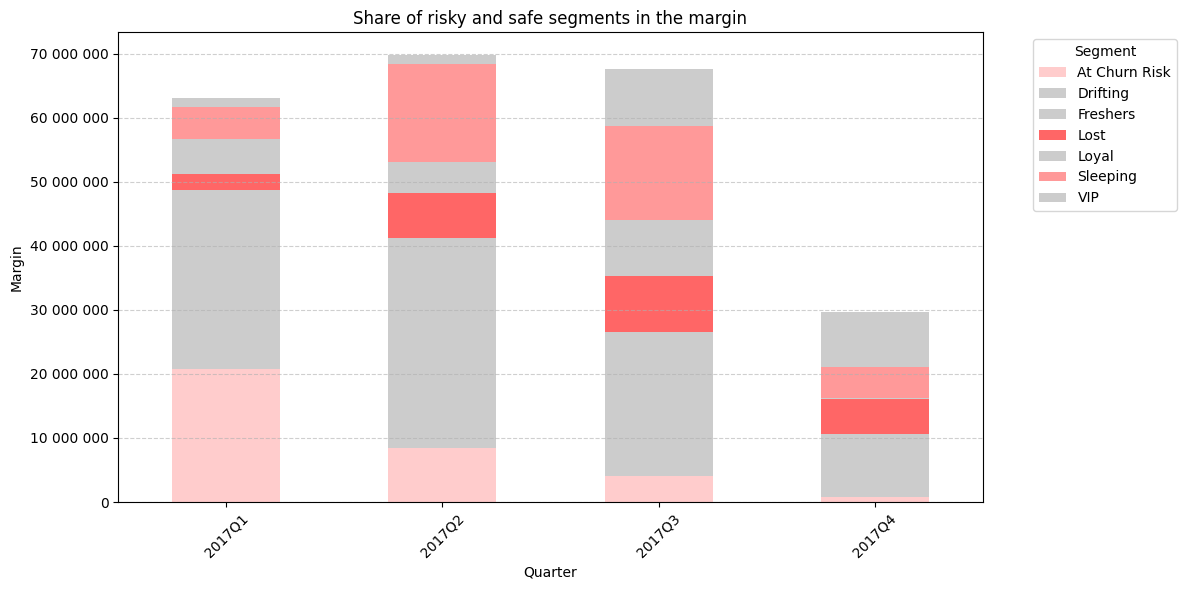

In [43]:
pivot_colored.plot(kind='bar', stacked=True, figsize=(12, 6), color=[segment_colors[c] for c in pivot_colored.columns])

plt.title('Share of risky and safe segments in the margin')
plt.ylabel('Margin')
plt.xlabel('Quarter')

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Risky Margin: absolute value 

In [44]:
pivot_colored

segment_group,At Churn Risk,Drifting,Freshers,Lost,Loyal,Sleeping,VIP
quarter,,,,,,,
2017Q1,20758180.12,7618142.38,20390384.34,2499480.25,5374416.07,5042817.59,1473408.40
2017Q2,8487454.11,17565813.12,15126100.50,7024998.97,4824875.20,15311167.06,1524392.00
2017Q3,4037283.29,10215618.18,12276404.73,8707528.84,8867319.49,14616423.64,8844524.55
2017Q4,711173.45,3030127.11,6885038.77,5399695.44,165216.53,4947409.85,8587770.79


In [45]:
lost_margin_per_quarter = (
    pivot_colored[risk_segments]
    .sum(axis=1)
    .reset_index(name='risk_margin_total')
)

lost_margin_per_quarter['total_margin_all'] = pivot_colored.sum(axis=1).values

In [46]:
lost_margin_per_quarter['risk_share'] = (
    lost_margin_per_quarter['risk_margin_total'] / lost_margin_per_quarter['total_margin_all']
).round(3)

In [47]:
lost_margin_per_quarter['risk_margin_total'] = lost_margin_per_quarter['risk_margin_total'].round().astype(int)
lost_margin_per_quarter['total_margin_all'] = lost_margin_per_quarter['total_margin_all'].round().astype(int)

lost_margin_per_quarter

,quarter,risk_margin_total,total_margin_all,risk_share
0,2017Q1,28300478,63156829,0.448
1,2017Q2,30823620,69864801,0.441
2,2017Q3,27361236,67565103,0.405
3,2017Q4,11058279,29726432,0.372
